In [ ]:
!pip install -U datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 16.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; pl

In [ ]:
!pip install hf_xet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 110.7 MB/s eta 0:00:00


In [ ]:
!pip install sentencepiece

# Dataset

In [ ]:
# from datasets import load_dataset
# from transformers import AutoTokenizer
# import torch
# from torch.utils.data import DataLoader

# # Config
# context_window = 128
# vocab_size = 30522  # For BERT tokenizer

# tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# def tokenize_fn(example):
#     return tokenizer(example["text"], truncation=True, padding="max_length", max_length=context_window + 1)

# # Deterministic slices
# train_dataset = load_dataset("c4", "en", split="train[:0.1%]", cache_dir="./data").map(tokenize_fn, batched=True)
# val_dataset = load_dataset("c4", "en", split="validation[:0.1%]", cache_dir="./data").map(tokenize_fn, batched=True)

# def collate_fn(batch):
#     input_ids = torch.tensor([item["input_ids"] for item in batch])
#     labels = input_ids[:, 1:].clone()
#     inputs = input_ids[:, :-1].clone()
#     return inputs, labels

# train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, collate_fn=collate_fn)
# val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False, collate_fn=collate_fn)


In [ ]:
# import torch
# import glob

# # Adjust this to your real path
# data_dir = "/content/drive/MyDrive/C4Validation/cache/C4/C4-en-8000/tokenized_chunks/train"
# files = sorted(glob.glob(f"{data_dir}/*.bin"))[:5]  # just a few files to test

# token_batches = []
# for file in files:
#     print(file)
#     data = torch.load(file, weights_only=False)
#     if isinstance(data, dict) and "input_ids" in data:
#         token_batches.append(data["input_ids"])  # assume [B, T]
#     elif isinstance(data, torch.Tensor):
#         token_batches.append(data)


In [ ]:
# from torch.utils.data import TensorDataset, DataLoader

# input_tensor = torch.cat(token_batches, dim=0)[:128]  # limit to 128 samples
# train_dataset = TensorDataset(input_tensor[:, :-1], input_tensor[:, 1:])
# train_loader = DataLoader(train_dataset, batch_size=8, shuffle=False)


In [ ]:
# from datasets import load_dataset
# from transformers import AutoTokenizer
# import torch
# from torch.utils.data import DataLoader

# # --- Tokenizer Setup ---
# tokenizer = AutoTokenizer.from_pretrained("gpt2")
# tokenizer.pad_token = tokenizer.eos_token
# tokenizer.model_max_length = 1024

# # --- Tokenization Function ---
# def tokenize_function(example):
#     return tokenizer(example["text"], truncation=True, padding="max_length", max_length=1024)

# # --- Load C4 subset (1%) ---
# dataset = load_dataset("c4", "en", split={"train": "train[:0.01%]", "validation": "validation[:0.01%]"}, cache_dir="./data")
# tokenized = {k: v.map(tokenize_function, batched=True, remove_columns=v.column_names) for k, v in dataset.items()}
# tokenized = {k: v.with_format("torch") for k, v in tokenized.items()}

# train_loader = DataLoader(tokenized["train"], batch_size=8, shuffle=True)
# val_loader = DataLoader(tokenized["validation"], batch_size=8)

In [ ]:
# from itertools import islice
# from datasets import load_dataset

# from datasets import load_dataset
# from transformers import AutoTokenizer
# import torch
# from torch.utils.data import DataLoader

# # --- Tokenizer Setup ---
# tokenizer = AutoTokenizer.from_pretrained("gpt2")
# tokenizer.pad_token = tokenizer.eos_token
# tokenizer.model_max_length = 1024

# # --- Tokenization Function ---
# def tokenize_function(example):
#     return tokenizer(example["text"], truncation=True, padding="max_length", max_length=1024)


# streamed = load_dataset("c4", "en", split="train", streaming=True)
# small_train = list(islice(streamed, 512))  # fetch just 512 samples

# tokenized = tokenizer([ex["text"] for ex in small_train],
#                       truncation=True, padding="max_length", max_length=1024,
#                       return_tensors="pt")

# input_ids = tokenized["input_ids"]
# train_dataset = torch.utils.data.TensorDataset(input_ids[:, :-1], input_ids[:, 1:])
# train_loader = DataLoader(train_dataset, batch_size=8)

In [ ]:
# from itertools import islice
# from datasets import load_dataset

# from datasets import load_dataset
# from transformers import AutoTokenizer
# import torch
# from torch.utils.data import DataLoader

# # --- Tokenizer Setup ---
# tokenizer = AutoTokenizer.from_pretrained("gpt2")
# tokenizer.pad_token = tokenizer.eos_token
# tokenizer.model_max_length = 1024

# # --- Tokenization Function ---
# def tokenize_function(example):
#     return tokenizer(example["text"], truncation=True, padding="max_length", max_length=1024)


# # === Streaming Load from C4 ===
# def get_loader(split_name, samples):
#     ds_stream = load_dataset("c4", "en", split=split_name, streaming=True)
#     ds_stream = list(islice(ds_stream, samples))  # Take only N samples

#     # Tokenize
#     tokenized = tokenizer([ex["text"] for ex in ds_stream],
#                           truncation=True, padding="max_length",
#                           max_length=1024, return_tensors="pt")

#     x = tokenized["input_ids"]
#     x_in, x_out = x[:, :-1], x[:, 1:]
#     dataset = torch.utils.data.TensorDataset(x_in, x_out)
#     return DataLoader(dataset, batch_size=8)

# # === Get both loaders ===
# train_loader = get_loader("train", 512)
# val_loader = get_loader("validation", 20)

In [ ]:
# from itertools import islice

# def stream_and_cache(split_name, num_samples, cache_path):
#     if os.path.exists(cache_path):
#         print(f"[Dataset] Loading cached {split_name} set...")
#         return torch.load(cache_path)

#     print(f"[Dataset] Streaming {split_name} set from C4...")
#     stream = load_dataset("c4", "en", split=split_name, streaming=True)
#     stream = list(islice(stream, num_samples))  # Only take N examples

#     tokenized = tokenizer([ex["text"] for ex in stream],
#                           truncation=True, padding="max_length", max_length=1024,
#                           return_tensors="pt")

#     dataset = torch.utils.data.TensorDataset(tokenized["input_ids"][:, :-1], tokenized["input_ids"][:, 1:])
#     torch.save(dataset, cache_path)
#     print(f"[Dataset] Saved cached {split_name} set to {cache_path}")
#     return dataset

# train_dataset = stream_and_cache("train", 40000, "/content/drive/MyDrive/cached_train_stream.pt")
# val_dataset = stream_and_cache("validation", 1000, "/content/drive/MyDrive/cached_val_stream.pt")

# train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=8)


NameError: name 'os' is not defined

# Dataset

In [ ]:
import sentencepiece as spm
import torch

class SentencePieceTokenizer:
    def __init__(self, model_path, max_length=1024):
        self.sp = spm.SentencePieceProcessor()
        self.sp.load(model_path)
        self.max_length = max_length
        # self.pad_id = self.sp.pad_id()
        self.bos_id = self.sp.bos_id()
        self.eos_id = self.sp.eos_id()
        self.unk_id = self.sp.unk_id()
        self.pad_id = self.sp.pad_id()

    def __call__(self, texts, truncation=True, padding="max_length", return_tensors="pt"):
        token_ids = []
        for text in texts:
            ids = self.sp.encode(text, out_type=int)
            if truncation:
                ids = ids[:self.max_length]
            if padding == "max_length":
                ids += [self.pad_id] * (self.max_length - len(ids))
            token_ids.append(ids)
        return {"input_ids": torch.tensor(token_ids)}


In [ ]:
# from datasets import load_dataset
# from itertools import islice
# import os
# import torch
# from torch.utils.data import DataLoader

# # Initialize tokenizer
# tokenizer = SentencePieceTokenizer("/content/drive/MyDrive/c4_spm_8000_final.model", max_length=1024)

# def stream_and_cache(split_name, num_samples, cache_path):
#     # if os.path.exists(cache_path):
#     #     print(f"[Dataset] Loading cached {split_name} set...")
#     #     return torch.load(cache_path)

#     print(f"[Dataset] Streaming {split_name} set from C4...")
#     stream = load_dataset("c4", "en", split=split_name, streaming=True)
#     stream = list(islice(stream, num_samples))

#     tokenized = tokenizer([ex["text"] for ex in stream],
#                           truncation=True, padding="max_length", return_tensors="pt")

#     dataset = torch.utils.data.TensorDataset(tokenized["input_ids"][:, :-1], tokenized["input_ids"][:, 1:])
#     torch.save(dataset, cache_path)
#     print(f"[Dataset] Saved cached {split_name} set to {cache_path}")
#     return dataset

# train_dataset = stream_and_cache("train", 40000, "/content/drive/MyDrive/cached_train_sp.pt")
# val_dataset = stream_and_cache("validation", 1000, "/content/drive/MyDrive/cached_val_sp.pt")

# train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=8)


In [ ]:
from datasets import load_dataset
from itertools import islice
import os
import torch
from torch.utils.data import DataLoader
context_len = 1024
batch_size = 8

# # === Tokenizer ===
# tokenizer = AutoTokenizer.from_pretrained("gpt2")
# tokenizer.pad_token = tokenizer.eos_token
# Initialize tokenizer
tokenizer = SentencePieceTokenizer("/content/drive/MyDrive/c4_spm_8000_final.model", max_length=1024)

# === Load pre-cached deterministic datasets ===
def load_cached_dataset(cache_path):
    if not os.path.exists(cache_path):
        raise FileNotFoundError(f"Cached dataset not found at: {cache_path}")
    print(f"[Dataset] Loading cached dataset from {cache_path}...")
    return torch.load(cache_path, weights_only=False)

train_dataset = load_cached_dataset("/content/drive/MyDrive/cached_train_sp.pt")
val_dataset = load_cached_dataset("/content/drive/MyDrive/cached_val_sp.pt")

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)


[Dataset] Loading cached dataset from /content/drive/MyDrive/cached_train_sp.pt...
[Dataset] Loading cached dataset from /content/drive/MyDrive/cached_val_sp.pt...


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
from typing import Optional, Tuple
from dataclasses import dataclass

@dataclass
class AttentionMask:
    src_length_mask: Optional[torch.Tensor]
    position_mask: Optional[torch.Tensor]


def log_mean(x: torch.Tensor, dim: int = 0):
    return x.logsumexp(dim) - math.log(x.shape[dim])


def entropy_l(l: torch.Tensor) -> torch.Tensor:
    return - (l * l.exp()).sum(-1)


def entropy_reg(sel: torch.Tensor, dim: int) -> torch.Tensor:
    sel = F.log_softmax(sel, dim=-1)
    sel = log_mean(sel, dim)
    return -entropy_l(sel).mean()

# def entropy_reg(sel: torch.Tensor, dim: int) -> torch.Tensor:
#     sel = F.log_softmax(sel, dim=dim)
#     log_mean = torch.logsumexp(sel, dim=dim) - math.log(sel.shape[dim])
#     return -(log_mean.exp() * log_mean).sum(-1).mean()



class SigmaMoE(nn.Module):
    def __init__(self, dmodel: int, n_experts: int, expert_size: int, k: int,
                 activation=F.relu,
                 v_dim: Optional[int] = None,
                 expert_dropout: float = 0.0):

        super().__init__()
        self.k_dim = dmodel
        self.v_dim = v_dim if v_dim is not None else dmodel
        self.n_experts = n_experts
        self.expert_size = expert_size
        self.k = k
        self.activation = activation
        self.expert_dropout = expert_dropout
        self.sel_hist = []

        # Expert parameters
        self.keys = nn.Parameter(torch.empty(n_experts, self.k_dim, self.expert_size))
        self.values = nn.Parameter(torch.empty(n_experts, self.expert_size, self.v_dim))
        self.expert_sel = nn.Parameter(torch.empty(n_experts, self.k_dim))

        self.reset_parameters()

    def reset_parameters(self):
        torch.nn.init.normal_(self.expert_sel, 0, 1.0 / math.sqrt(self.k_dim))
        torch.nn.init.normal_(self.keys, 0, 1.0 / math.sqrt(self.k_dim))
        torch.nn.init.normal_(self.values, 0, 1.0 / math.sqrt(self.n_experts * self.expert_size))

    def get_reg_loss(self) -> torch.Tensor:
        if not self.sel_hist:
            return torch.tensor(0.0, device=self.expert_sel.device)
        loss = entropy_reg(torch.stack(self.sel_hist, dim=-2).flatten(-3, -2), -2)
        # loss = entropy_reg(torch.stack(self.sel_hist, dim=0).flatten(0, -2), -1)
        self.sel_hist = []
        return loss

    def forward(self, x: torch.Tensor, sel_input: Optional[torch.Tensor] = None) -> torch.Tensor:
        B, T, D = x.shape
        inp = sel_input if sel_input is not None else x  # selection input
        sel = F.linear(inp, self.expert_sel)  # [B, T, n_experts]
        if self.training:
            self.sel_hist.append(sel)

        if self.training and self.expert_dropout > 0:
            mask = torch.rand_like(sel) < self.expert_dropout
            sel = sel.masked_fill(mask, float("-inf"))

        sel_val, sel_idx = sel.topk(self.k, dim=-1)  # Top-k routing
        weights = F.softmax(sel_val, dim=-1)  # Soft weighting of top-k

        expert_out = torch.zeros(B, T, self.v_dim, device=x.device)
        for i in range(self.k):
            indices = sel_idx[..., i]  # [B, T]
            w = weights[..., i]  # [B, T]

            expert_emb = torch.einsum('btd,edh->bteh', x, self.keys)  # [B, T, n_experts, H]
            expert_emb = self.activation(expert_emb)

            out_proj = torch.einsum('bteh,ehd->bted', expert_emb, self.values)  # [B, T, n_experts, D]

            expert_out += torch.sum(
                F.one_hot(indices, self.n_experts).unsqueeze(-1) * out_proj * w.unsqueeze(-1).unsqueeze(-1),
                dim=2
            )  # sum over experts

        return expert_out


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from typing import Tuple

class SigmaMoELayer(nn.Module):
    def __init__(self, d_model, n_heads, ff_n_experts, ff_expert_size, ff_k=8, ff_expert_dropout=0.0, dropout=0.1):
        super().__init__()
        self.attn = nn.MultiheadAttention(d_model, n_heads, dropout=dropout, batch_first=True)
        self.ffn = SigmaMoE(d_model, ff_n_experts, ff_expert_size, k=ff_k, expert_dropout=ff_expert_dropout)
        self.ln1 = nn.LayerNorm(d_model)
        self.ln2 = nn.LayerNorm(d_model)
        self.drop = nn.Dropout(dropout)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        residual = x
        x = self.ln1(x)
        x, _ = self.attn(x, x, x, need_weights=False)
        x = residual + self.drop(x)

        residual = x
        x = self.ln2(x)
        x = self.ffn(x)
        return residual + x

class SigmaMoELM(nn.Module):
    def __init__(self, n_tokens: int, d_model: int, n_layers: int, n_heads: int,
                 ff_n_experts: int, ff_expert_size: int, ff_k: int = 8, dropout: float = 0.1,
                 ff_expert_dropout: float = 0.0, entropy_reg: float = 0.01):
        super().__init__()
        self.embedding = nn.Embedding(n_tokens, d_model)
        self.layers = nn.ModuleList([
            SigmaMoELayer(d_model, n_heads, ff_n_experts, ff_expert_size, ff_k, ff_expert_dropout, dropout)
            for _ in range(n_layers)
        ])
        self.out_norm = nn.LayerNorm(d_model)
        # self.lm_head = nn.Linear(d_model, n_tokens)
        self.lm_head = nn.Linear(d_model, n_tokens)

        self.entropy_reg = entropy_reg

        self.reset_parameters()

    def reset_parameters(self):
        torch.nn.init.kaiming_normal_(self.embedding.weight)
        for layer in self.modules():
            if isinstance(layer, nn.LayerNorm):
                nn.init.ones_(layer.weight)
                nn.init.zeros_(layer.bias)

    def forward(self, x: torch.Tensor) -> Tuple[torch.Tensor, torch.Tensor]:
        x = self.embedding(x)
        for layer in self.layers:
            x = layer(x)
        x = self.out_norm(x)
        logits = self.lm_head(x)

        # collect entropy loss
        reg_loss = torch.zeros(1, device=x.device)
        for layer in self.modules():
            if isinstance(layer, SigmaMoE):
                reg_loss += self.entropy_reg * layer.get_reg_loss()

        return logits, reg_loss


In [ ]:
import os
# prefix = "moe"
# prefix = "sigmamoe_20m_10kstp"
# prefix = "sigmamoe_20m_1000stp"
prefix = "sigmamoe_20m_1000stp_final"
os.makedirs('/content/drive/MyDrive/sigmamoe', exist_ok=True)
os.makedirs('/content/drive/MyDrive/sigmamoe/checkpoints', exist_ok=True)

# === Checkpointing ===
def save_checkpoint(model, optimizer, step, path=f"/content/drive/MyDrive/sigmamoe/checkpoints/{prefix}.pt"):
    os.makedirs(os.path.dirname(path), exist_ok=True)
    torch.save({
        "model_state": model.state_dict(),
        "optimizer_state": optimizer.state_dict(),
        "step": step
    }, path)
    print(f"[Checkpoint] Saved at step {step} → {path}")

def load_checkpoint(model, optimizer, path=f"/content/drive/MyDrive/sigmamoe/checkpoints/{prefix}.pt"):
    if not os.path.exists(path):
        print("[Checkpoint] No checkpoint found.")
        return 0  # start from scratch

    ckpt = torch.load(path, map_location=device)
    model.load_state_dict(ckpt['model_state'])
    optimizer.load_state_dict(ckpt["optimizer_state"])
    print(f"[Checkpoint] Loaded from {path} at step {ckpt['step']}")
    return ckpt["step"]

In [ ]:
def evaluate(model, val_loader, vocab_size, device):

    # --- Evaluation Function ---
    model.eval()
    total_loss, total_tokens = 0.0, 0
    with torch.no_grad():
        for batch in val_loader:
            x, y = batch
            x, y = x.to(device), y.to(device)
            logits, reg_loss = model(x)
            ce_loss = F.cross_entropy(logits.view(-1, logits.size(-1)), y.view(-1), ignore_index=tokenizer.pad_id)
            total_loss += (ce_loss.item() + reg_loss.item()) * y.numel()
            total_tokens += y.numel()
    avg_loss = total_loss / total_tokens
    perplexity = torch.exp(torch.tensor(avg_loss))
    print(f"[Eval @ step {step}] Loss: {avg_loss:.4f}, Perplexity: {perplexity:.2f}")
    model.train()


def train_sigmoe_on_c4(model, train_loader, val_loader, device, vocab_size, optimizer, num_steps=1000, eval_every=100):
    model.train()
    # --- Training ---
    loss_history = []
    perplexity = []
    for epoch in range(3):

        step = 0
        for batch in train_loader:
            model.train()
            if step >= n_steps:
                break
            x, y = batch
            x = x.to(device)
            y = y.to(device)
            logits, reg_loss = model(x)
            ce_loss = F.cross_entropy(logits.view(-1, logits.size(-1)), y.view(-1), ignore_index=tokenizer.pad_id)
            total_loss = ce_loss + reg_loss

            optimizer.zero_grad()
            total_loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.1)  # gradient clipping
            optimizer.step()
            scheduler.step()
            loss_history.append(total_loss.item())
            perplexity.append(torch.exp(torch.tensor(total_loss.item())).item())


            if step % 10 == 0:
                print(f"[Step {step}] Loss: {ce_loss.item():.4f} + Reg: {reg_loss.item()}")
            if step % eval_every == 0 and step != 0:
                # evaluate(model, val_loader, tokenizer.sp.get_piece_size(), device)
                save_checkpoint(model, optimizer, step)
            step += 1
        if step >= n_steps:
            break

    print(f"Training completed in {(time.time() - start_time)/60:.2f} minutes.")
    return loss_history, perplexity

In [ ]:
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from datasets import load_dataset
from torch.optim.lr_scheduler import CosineAnnealingLR
import time



In [ ]:
n_steps = 1000
eval_every = 1
step = 0
start_time = time.time()

In [ ]:
vocab_size = tokenizer.sp.get_piece_size()
d_model = 412
n_layers = 10
ff_expert_size = 82
dropout = 0.0


config = {
    "n_tokens": vocab_size,
    "d_model": d_model,
    "n_layers": n_layers,
    "n_heads": 4,                 # Unused in σ-MoE but kept for consistency
    "ff_n_experts": 13,           # From matched pair
    "ff_expert_size": ff_expert_size,
    "ff_k": 4,                    # Top-k routing
    "dropout": dropout,
    "ff_expert_dropout": 0.0,
    "entropy_reg": 0.01
}


In [ ]:
# --- Model & Optimizer ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SigmaMoELM(**config).to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=2.5e-4, weight_decay=0.01)
scheduler = CosineAnnealingLR(optimizer, T_max=n_steps)

In [ ]:
print("Training SigmaMoE on C4 (0.1%)...")
loss_history, perplexity = train_sigmoe_on_c4(model, train_loader, val_loader, device, tokenizer.sp.get_piece_size(), optimizer, num_steps=n_steps)


Training SigmaMoE on C4 (0.1%)...
[Step 0] Loss: 9.1272 + Reg: -0.210819274187088
[Step 10] Loss: 7.8268 + Reg: -0.24692444503307343
[Step 20] Loss: 7.1643 + Reg: -0.2532539963722229
[Step 30] Loss: 6.9646 + Reg: -0.25517818331718445
[Step 40] Loss: 6.9073 + Reg: -0.25494953989982605
[Step 50] Loss: 7.2232 + Reg: -0.25556954741477966
[Step 60] Loss: 7.1628 + Reg: -0.2555803060531616
[Step 70] Loss: 7.1212 + Reg: -0.25467535853385925
[Step 80] Loss: 6.8537 + Reg: -0.25424182415008545
[Step 90] Loss: 6.8707 + Reg: -0.25303134322166443
[Step 100] Loss: 6.9558 + Reg: -0.2525961399078369
[Checkpoint] Saved at step 100 → /content/drive/MyDrive/sigmamoe/checkpoints/sigmamoe_20m_1000stp_final.pt
[Step 110] Loss: 6.5968 + Reg: -0.253523588180542
[Step 120] Loss: 6.7812 + Reg: -0.2523336708545685
[Step 130] Loss: 6.5892 + Reg: -0.25288379192352295
[Step 140] Loss: 6.7313 + Reg: -0.25315961241722107
[Step 150] Loss: 6.6767 + Reg: -0.2537907361984253
[Step 160] Loss: 6.4172 + Reg: -0.2537955641746

In [ ]:
from matplotlib import pyplot as plt

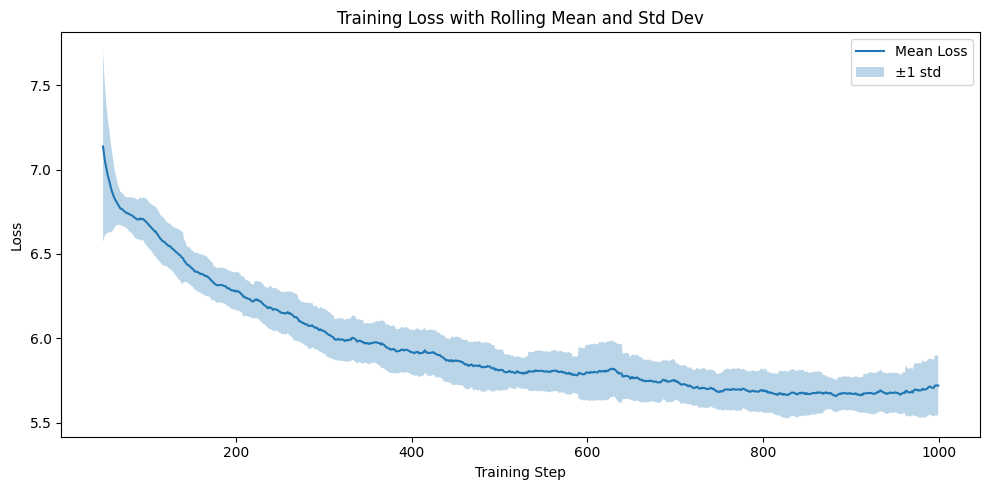

Training completed.


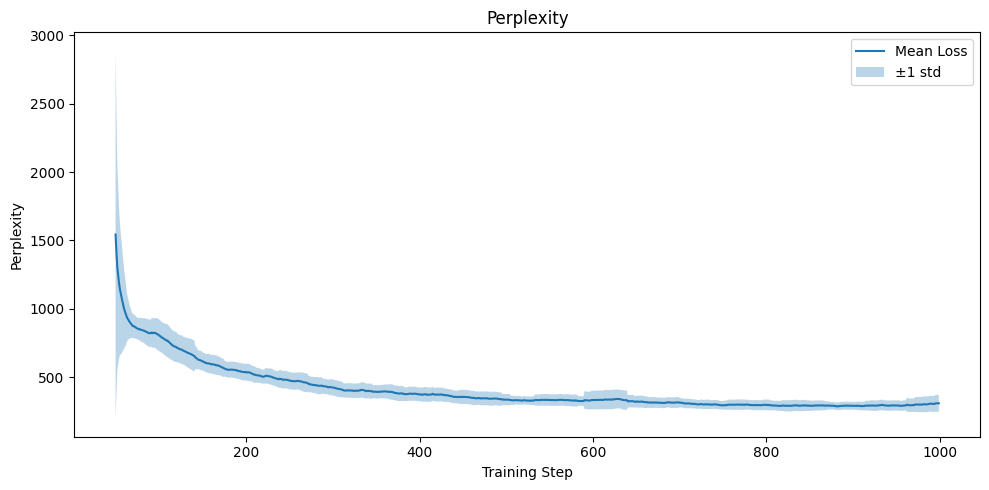

Training completed.


In [ ]:
# Plot loss with rolling mean and std
losses = torch.tensor(loss_history)
window = 50
if len(losses) >= window:
  rolling_mean = losses.unfold(0, window, 1).mean(dim=1)
  rolling_std = losses.unfold(0, window, 1).std(dim=1)
  x_range = range(window - 1, len(losses))

  plt.figure(figsize=(10, 5))
  plt.plot(x_range, rolling_mean, label='Mean Loss')
  plt.fill_between(x_range,
                    rolling_mean - rolling_std,
                    rolling_mean + rolling_std,
                    alpha=0.3, label='±1 std')
  plt.title("Training Loss with Rolling Mean and Std Dev")
  plt.xlabel("Training Step")
  plt.ylabel("Loss")
  plt.legend()
  plt.tight_layout()
  plt.show()

print("Training completed.")


# Plot loss with rolling mean and std
losses = torch.tensor(perplexity)
window = 50
if len(losses) >= window:
  rolling_mean = losses.unfold(0, window, 1).mean(dim=1)
  rolling_std = losses.unfold(0, window, 1).std(dim=1)
  x_range = range(window - 1, len(losses))

  plt.figure(figsize=(10, 5))
  plt.plot(x_range, rolling_mean, label='Mean Loss')
  plt.fill_between(x_range,
                    rolling_mean - rolling_std,
                    rolling_mean + rolling_std,
                    alpha=0.3, label='±1 std')
  plt.title("Perplexity")
  plt.xlabel("Training Step")
  plt.ylabel("Perplexity")
  plt.legend()
  plt.tight_layout()
  plt.show()

print("Training completed.")

In [ ]:
import os
import csv

# Save raw loss values
def save_losses_to_file(losses, filename=f"/content/drive/MyDrive/{prefix}training_loss_log.csv"):
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    with open(filename, mode="w", newline="") as f:
        writer = csv.writer(f)
        writer.writerow(["step", "loss"])
        for i, loss in enumerate(zip(losses, perplexity)):
            writer.writerow([i, loss[0], loss[1]])


In [ ]:
save_losses_to_file(loss_history)


In [ ]:
print("Training SigmaMoE on C4 (0.1%)...")
train_sigmoe_on_c4(model, train_loader, val_loader, device, tokenizer.sp.get_piece_size(), optimizer, num_steps=n_steps)


Training SigmaMoE on C4 (0.1%)...
[Step 0] Loss: 9.1932 + Reg: -0.2106308937072754
[Step 10] Loss: 7.6238 + Reg: -0.24821718037128448
[Step 20] Loss: 7.2188 + Reg: -0.25359928607940674
[Step 30] Loss: 7.0083 + Reg: -0.25477129220962524
[Step 40] Loss: 6.9514 + Reg: -0.2552572786808014
[Step 50] Loss: 7.0408 + Reg: -0.25529199838638306
[Step 60] Loss: 6.9028 + Reg: -0.25523290038108826
[Step 70] Loss: 6.8309 + Reg: -0.25517159700393677
[Step 80] Loss: 7.0991 + Reg: -0.2550627589225769
[Step 90] Loss: 6.8805 + Reg: -0.2542700171470642
[Step 100] Loss: 6.7647 + Reg: -0.2538096308708191
[Checkpoint] Saved at step 100 → /content/drive/MyDrive/sigmamoe/checkpoints/sigmamoe_20m_10kstp.pt
[Step 110] Loss: 7.0467 + Reg: -0.2528105080127716
[Step 120] Loss: 6.8624 + Reg: -0.25266000628471375
[Step 130] Loss: 6.7095 + Reg: -0.2534649670124054
[Step 140] Loss: 6.7669 + Reg: -0.2526789903640747
[Step 150] Loss: 6.6048 + Reg: -0.25374338030815125
[Step 160] Loss: 6.7436 + Reg: -0.25359341502189636
[

In [ ]:
evaluate(model, val_loader, tokenizer.sp.get_piece_size(), device)

[Eval @ step 0] Loss: 4.8449, Perplexity: 127.09


In [ ]:
step = load_checkpoint(model, optimizer)


[Checkpoint] Loaded from /content/drive/MyDrive/sigmamoe/checkpoints/sigmamoe_20m_10kstp.pt at step 4900


In [ ]:
evaluate(model, val_loader, tokenizer.sp.get_piece_size(), device)

[Eval @ step 0] Loss: 5.9297, Perplexity: 376.05


In [ ]:
import torch
import copy
import numpy as np
from tqdm import tqdm

def swap_expert_ffn(model: nn.Module, layer_i: int, expert_i: int,
                    layer_j: int, expert_j: int) -> None:
    moe_i = model.layers[layer_i].ffn
    moe_j = model.layers[layer_j].ffn

    with torch.no_grad():
        tmp_key = moe_i.keys[expert_i].clone()
        moe_i.keys[expert_i] = moe_j.keys[expert_j]
        moe_j.keys[expert_j] = tmp_key

        tmp_val = moe_i.values[expert_i].clone()
        moe_i.values[expert_i] = moe_j.values[expert_j]
        moe_j.values[expert_j] = tmp_val

def get_all_expert_pairs(model: nn.Module):
    n_layers = len(model.layers)
    n_experts = model.layers[0].ffn.n_experts
    return [(l1, e1, l2, e2)
            for l1 in range(n_layers)
            for l2 in range(n_layers)
            for e1 in range(n_experts)
            for e2 in range(n_experts)]

def run_all_swaps_and_evaluate(model: nn.Module, evaluate_fn):
    original_model = copy.deepcopy(model)
    expert_pairs = get_all_expert_pairs(model)

    results = []
    for l1, e1, l2, e2 in tqdm(expert_pairs, desc="Swapping experts"):
        if l1 == l2 and e1 == e2:
            continue  # skip identity swaps

        # Clone model fresh every time
        model_copy = copy.deepcopy(original_model)
        swap_expert_ffn(model_copy, l1, e1, l2, e2)
        acc = evaluate_fn(model_copy)
        results.append(((l1, e1), (l2, e2), acc))

    return results


In [ ]:
# SigmaMoE Task-by-Task Zero-Shot Evaluation Templates

import torch
import torch.nn.functional as F
from datasets import load_dataset

# Load tokenizer
tokenizer = SentencePieceTokenizer("/content/drive/MyDrive/c4_spm_8000_final.model", max_length=1024)

# Utility to get log-likelihood of a sequence
@torch.no_grad()
def get_log_likelihood(model, input_ids):
    input_ids = input_ids.unsqueeze(0).to(device)  # [1, T]
    logits, _ = model(input_ids[:, :-1])  # logits: [1, T-1, V]
    log_probs = F.log_softmax(logits, dim=-1)
    target_ids = input_ids[:, 1:]
    return log_probs[0, torch.arange(target_ids.size(1)), target_ids[0]].sum().item()

# Evaluate PIQA
piqa = load_dataset("piqa", split="validation")
correct = 0
for item in piqa:
    ctx = item["goal"]
    opt0 = tokenizer([ctx + " " + item["sol1"]])["input_ids"][0]
    opt1 = tokenizer([ctx + " " + item["sol2"]])["input_ids"][0]

    s0 = get_log_likelihood(model, torch.tensor(opt0))
    s1 = get_log_likelihood(model, torch.tensor(opt1))
    pred = 0 if s0 > s1 else 1
    correct += int(pred == item["label"])
print("PIQA Accuracy:", correct / len(piqa))


# More tasks: CBT, HellaSwag, ARC-E, BLiMP would follow a similar pattern.
# For MCQA-style (ARC, HellaSwag), compare log-likelihoods of completions.
# For acceptability judgments (BLiMP), score pairs and prefer grammatical ones.

# Let me know if you'd like each task filled in as a ready-to-run script.


<ipython-input-16-f9582f07a803>:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  s0 = get_log_likelihood(model, torch.tensor(opt0))
<ipython-input-16-f9582f07a803>:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  s1 = get_log_likelihood(model, torch.tensor(opt1))


PIQA Accuracy: 0.49836779107725787


README.md:   0%|          | 0.00/7.32k [00:00<?, ?B/s]

train-00000-of-00002.parquet:   0%|          | 0.00/269M [00:00<?, ?B/s]

train-00001-of-00002.parquet:   0%|          | 0.00/281M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2662 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5153 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/4869 [00:00<?, ? examples/s]

<ipython-input-16-f9582f07a803>:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_ids = torch.tensor(tokens[:-1])


AttributeError: 'SigmaMoELM' object has no attribute 'device'

In [ ]:
from datasets import load_dataset
import torch
import torch.nn.functional as F

lambada = load_dataset("lambada", split="validation")
correct = 0
total = 0

for item in lambada:
    text = item["text"]
    tokens = tokenizer([text])["input_ids"][0]
    if len(tokens) < 2:
        continue

    input_ids = torch.tensor(tokens[:-1]).unsqueeze(0).to(device)  # input tokens except last
    target_id = tokens[-1]  # actual last token

    with torch.no_grad():
        logits, _ = model(input_ids)
        log_probs = F.log_softmax(logits[0, -1], dim=-1)  # get next-token distribution
        predicted_id = torch.argmax(log_probs).item()

    correct += int(predicted_id == target_id)
    total += 1

print(f"LAMBADA Accuracy: {correct / total:.4f} ({correct}/{total})")


<ipython-input-17-2750757c0725>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_ids = torch.tensor(tokens[:-1]).unsqueeze(0).to(device)  # input tokens except last


LAMBADA Accuracy: 0.0000 (0/4869)


In [ ]:
# Evaluate LAMBADA (next token prediction accuracy)
lambada = load_dataset("lambada", split="validation")
correct = 0
for item in lambada:
    text = item["text"]
    tokens = tokenizer([text])["input_ids"][0]
    if len(tokens) < 2:
        continue
    input_ids = torch.tensor(tokens[:-1])
    target = tokens[-1]
    logits, _ = model(input_ids.unsqueeze(0).to(device))
    pred = torch.argmax(logits[0, -1]).item()
    print(pred, target)
    correct += int(pred == target)
print("LAMBADA Accuracy:", correct / len(lambada))


<ipython-input-18-2f63b05e147b>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_ids = torch.tensor(tokens[:-1])


2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
530 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
530 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
530 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0)
2401 tensor(0

KeyboardInterrupt: 

# MNLI Finetuning

In [ ]:
!pip install -U datasets

In [ ]:
import torch
from torch.utils.data import DataLoader
from transformers import AutoTokenizer
from datasets import load_dataset
from torch.nn.functional import cross_entropy
from tqdm import tqdm

# --- Config ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_train = 20000
n_val = 1000
batch_size = 16
max_length = 128

# --- Load MNLI subset ---
# tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
dataset = load_dataset("glue", "mnli")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
import sentencepiece as spm
import torch

class SentencePieceTokenizer:
    def __init__(self, model_path, max_length=1024):
        self.sp = spm.SentencePieceProcessor()
        self.sp.load(model_path)
        self.max_length = max_length
        # self.pad_id = self.sp.pad_id()
        self.bos_id = self.sp.bos_id()
        self.eos_id = self.sp.eos_id()
        self.unk_id = self.sp.unk_id()
        self.pad_id = self.sp.pad_id()

    def __call__(self, texts, truncation=True, padding="max_length", return_tensors="pt"):
        token_ids = []
        for text in texts:
            ids = self.sp.encode(text, out_type=int)
            if truncation:
                ids = ids[:self.max_length]
            if padding == "max_length":
                ids += [self.pad_id] * (self.max_length - len(ids))
            token_ids.append(ids)
        return {"input_ids": torch.tensor(token_ids)}


In [ ]:
def tokenize(example):
    batch = tokenizer(
        [f"{p} </s> {h}" for p, h in zip(example["premise"], example["hypothesis"])], padding="max_length", truncation=True)
    return {"input_ids": batch["input_ids"], "label": example["label"]}

train_data = dataset["train"].select(range(n_train)).map(tokenize, batched=True, load_from_cache_file=False)
val_data = dataset["validation_matched"].select(range(n_val)).map(tokenize, batched=True, load_from_cache_file=False)

# --- Format for PyTorch ---
cols = ["input_ids", "label"]
train_data.set_format(type="torch", columns=cols)
val_data.set_format(type="torch", columns=cols)

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size)

Map:   0%|          | 0/20000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [ ]:
# --- Model & Optimizer ---
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.lm_head = torch.nn.Linear(d_model, 3).to(device)
# optimizer = torch.optim.AdamW(model.parameters(), lr=2.5e-4, weight_decay=0.01)
# scheduler = CosineAnnealingLR(optimizer, T_max=n_steps
# model = SigmaMoELM(**config).to(device)
# optimizer = torch.optim.AdamW(model.parameters(), lr=2.5e-4, weight_decay=0.01)
# scheduler = CosineAnnealingLR(optimizer, T_max=n_steps)

In [ ]:
optimizer = torch.optim.AdamW(model.parameters(), lr=2.5e-4, weight_decay=0.01)


In [ ]:


# --- Training Loop ---
for epoch in range(1):
    model.train()
    pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}")
    for batch in pbar:
        input_ids = batch["input_ids"].to(device)
        labels = batch["label"].to(device)

        optimizer.zero_grad()
        logits, reg_loss = model(input_ids)
        loss = cross_entropy(logits, labels) + reg_loss
        loss.backward()
        optimizer.step()
        pbar.set_postfix(loss=loss.item())

# --- Evaluation ---
model.eval()
total, correct = 0, 0
with torch.no_grad():
    for batch in val_loader:
        input_ids = batch["input_ids"].to(device)
        labels = batch["label"].to(device)
        logits, _ = model(input_ids)
        preds = logits.argmax(dim=-1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

acc = correct / total
print(f"[Validation @ epoch {epoch+1}] Accuracy: {acc:.4f}")


Epoch 1:   0%|          | 0/1250 [00:00<?, ?it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 336.00 MiB. GPU 0 has a total capacity of 39.56 GiB of which 134.88 MiB is free. Process 76866 has 39.42 GiB memory in use. Of the allocated memory 37.83 GiB is allocated by PyTorch, and 1.09 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)